In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 'pyr_four_nostr.csv' is the original classifier train set
# 'pyr_four_nostr_mmstats.csv' adds in 10 additional mito-to-mito distance statistics

pyr_four = pd.read_csv('pyr_four_nostr.csv', index_col=[0])

In [5]:
# split test size
testsize = 0.30

# number of estimators
n_est = 100

# random state
random_st = 1

# decision tree classifier conditions
min_sampleaf = 1
min_sampsplit = 2 
min_weightfractionleaf = 0.0

In [6]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

In [8]:
predictions = dtree.predict(X_test)

In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.79      0.79      0.79      5946
      Axonal       0.73      0.74      0.74      3783
       Basal       0.84      0.85      0.84     16341
     Somatic       0.96      0.96      0.96     28202

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [10]:
print(confusion_matrix(y_test,predictions))

[[ 4700    68   975   203]
 [   68  2805   799   111]
 [  938   812 13828   763]
 [  217   155   796 27034]]


In [11]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_st)
rfc.fit(X_train, y_train)
elapsed_time = time.time() - start_time

In [12]:
print(f"Elapsed time to compute the Random Forest Classifer: {elapsed_time:.3f} seconds")

Elapsed time to compute the Random Forest Classifer: 48.034 seconds


In [13]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 4667    25  1030   224]
 [   42  2949   673   119]
 [  625   424 14646   646]
 [   64    14   326 27798]]


In [14]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.86      0.78      0.82      5946
      Axonal       0.86      0.78      0.82      3783
       Basal       0.88      0.90      0.89     16341
     Somatic       0.97      0.99      0.98     28202

    accuracy                           0.92     54272
   macro avg       0.89      0.86      0.88     54272
weighted avg       0.92      0.92      0.92     54272



In [15]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [16]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [17]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 47.407 seconds


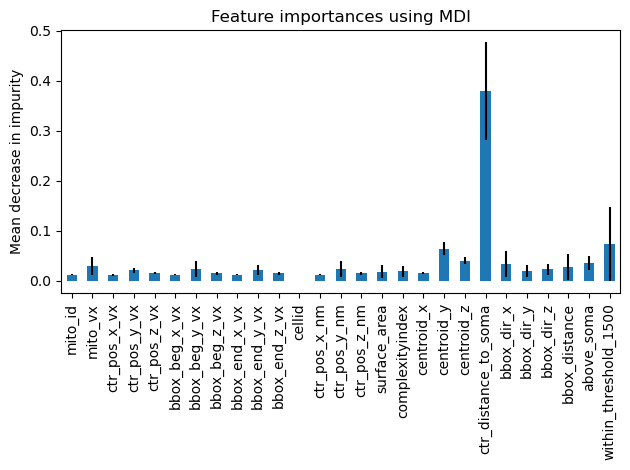

In [18]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
# re-run without updating rfc
# these 3 lines are required for the increased accuracy; if you uncomment them, the following analysis is not different from above
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize)

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

DecisionTreeClassifier(random_state=1)

In [21]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.78      0.79      0.78      6073
      Axonal       0.73      0.75      0.74      3751
       Basal       0.85      0.84      0.84     16438
     Somatic       0.96      0.96      0.96     28010

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [22]:
print(confusion_matrix(y_test,predictions))

[[ 4802    79   981   211]
 [   78  2812   716   145]
 [ 1050   814 13758   816]
 [  237   131   799 26843]]


In [23]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 5702    10   303    58]
 [    9  3516   187    39]
 [  200   139 15904   195]
 [   16     2    97 27895]]


In [24]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.96      0.94      0.95      6073
      Axonal       0.96      0.94      0.95      3751
       Basal       0.96      0.97      0.97     16438
     Somatic       0.99      1.00      0.99     28010

    accuracy                           0.98     54272
   macro avg       0.97      0.96      0.96     54272
weighted avg       0.98      0.98      0.98     54272



In [25]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [26]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

In [27]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 47.518 seconds


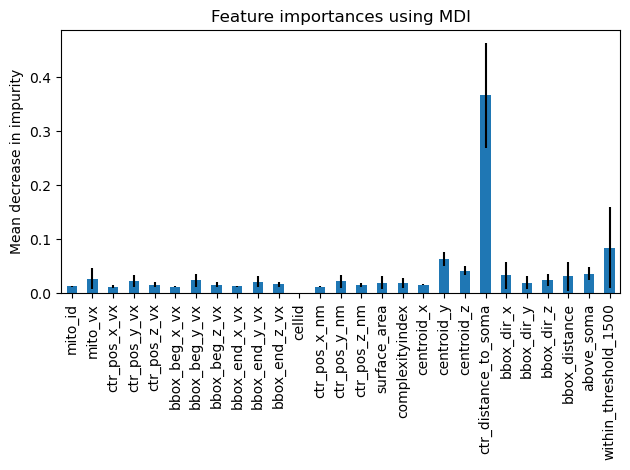

In [28]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()